In [1]:
import pandas as pd
import numpy as np

,시군별,자기집,전세,보증부월세,무보증월세,사글세,무상
0,전주시,135793,32471,47008,3198,1778,4635
1,군산시,60997,12065,15739,1857,1305,2981
2,익산시,69861,10381,19024,2603,4040,3482
3,정읍시,32333,2625,5753,769,839,1397
4,남원시,22000,3197,3278,803,923,1128
5,김제시,25953,2129,3702,396,270,845
6,완주군,19812,3291,3007,820,661,1902
7,진안군,8138,288,245,115,51,316
8,무주군,7676,359,499,195,126,621
9,장수군,6996,274,549,133,35,313


In [25]:
nowon_2020 = pd.read_csv("data/거처의_종류별_점유형태별_가구형태별_가구_일반가구_시군구_20220107155511.csv" , encoding='cp949' , thousands=',' )

#맥과 window의 os 차이로 csv 파일이 열리지 않는 경우가 생기곤 함. 그럴 땐 인코딩타입을 encoding='cp949'로 바꿔주거나 메모장에서 utf-8로 변경해준다

nowon_2020.replace({'-' : 0}, inplace = True)


nowon_2020.drop([0] , inplace = True)

# nowon_2020.describe() 
nowon_2020['2020_tot']  = nowon_2020.sum(axis = 1) #행별 합 구하기. 축이 columns 로 정해지기 때문에 가로방향으로 합이 구해진다

nowon_2020

C:\Users\BIT\AppData\Local\Temp/ipykernel_12860/320247603.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nowon_2020['2020_tot']  = nowon_2020.sum(axis = 1) #행별 합 구하기. 축이 columns 로 정해지기 때문에 가로방향으로 합이 구해진다


,행정구역별,거처의종류별,점유형태별,2020,2020.1,2020.2,2020.3,2020.4,2020_tot
1,노원구,계,자가,104051,17209,14,9211,14734,145205
2,노원구,계,전세(월세없음),43955,12826,68,3709,2084,62574
3,노원구,계,보증금 있는 월세,46272,21830,436,8323,3069,79494
4,노원구,계,보증금 없는 월세,3059,2115,66,683,182,6039
5,노원구,계,사글세,497,224,0,108,28,857
6,노원구,계,"무상(관사, 사택 등)",4861,2234,33,973,337,8405


In [37]:
# x = nowon_2020[0].sum()


# print(type(nowon_2020))


nowon_2020
sum = nowon_2020.sum(axis = 'columns')  #행별 합 구하기. 축이 columns 로 정해지기 때문에 가로방향으로 합이 구해진다

self_2020= sum[1]
# lease_2020 = sum[1:5]

# print(lease_2020)
# print(self_2020)

self_2020



C:\Users\BIT\AppData\Local\Temp/ipykernel_1648/1334899437.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = nowon_2020.sum(axis = 'columns')  #행별 합 구하기. 축이 columns 로 정해지기 때문에 가로방향으로 합이 구해진다


290410

In [3]:
nowon_2015 = pd.read_csv("data/주택점유형태별_가구_일반가구__20220107171716.csv" , encoding = "cp949")


nowon_2015
nowon_2015.drop(columns = '구분(1)', inplace = True)
nowon_2015.rename(columns = {'주택점유형태(1)' : '점유형태별 '}, inplace = True)
nowon_2015.rename(columns = {'자치구(1)' : '행정구역별 '}, inplace = True)
nowon_2015.drop(labels=[0] , axis = 0 , inplace = True)  



nowon_2015

,행정구역별,점유형태별,2015
1,노원구,자가,104578
2,노원구,전세,46723
3,노원구,보증부월세,43131
4,노원구,무보증월세,3845
5,노원구,사글세,631
6,노원구,무상,5982


In [4]:
nw= pd.concat([nowon_2015,nowon_2020] , axis = 1)

nw.drop(columns = ['거처의종류별','2020','2020.1','2020.2','2020.3','2020.4','행정구역별','점유형태별'],  inplace = True) 
nw.rename(columns = {'2020_tot' : '2020'}, inplace = True)
nw


,행정구역별,점유형태별,2015,2020
1,노원구,자가,104578,145205
2,노원구,전세,46723,62574
3,노원구,보증부월세,43131,79494
4,노원구,무보증월세,3845,6039
5,노원구,사글세,631,857
6,노원구,무상,5982,8405


In [5]:
lease = nw.loc[2:5 , ['2015','2020']].sum()

lease


nw.loc[7] = ['노원구', '총임대', lease['2015'] , lease['2020']]

nw



,행정구역별,점유형태별,2015,2020
1,노원구,자가,104578,145205
2,노원구,전세,46723,62574
3,노원구,보증부월세,43131,79494
4,노원구,무보증월세,3845,6039
5,노원구,사글세,631,857
6,노원구,무상,5982,8405
7,노원구,총임대,94330,148964


In [6]:
import pandas as ps
import matplotlib.pyplot as plt  
import numpy as np


year = pd.Series([2015, 2020])  
self_ = nw.loc[1 , '2015':'2020'] 
longtermlent= nw.loc[2 , '2015':'2020']
monthly = nw.loc[3:5 , '2015':'2020'].sum()
free = nw.loc[6 , '2015':'2020']
tot_lease = nw.loc[7 , '2015':'2020']



occu = pd.DataFrame( {'연도': year , 
                      '자가' : self_ ,
                      '총임대' : tot_lease,
                      '전세' : longtermlent,
                      '월세' : monthly, 
                      '무상' : free})



occu.drop(columns=['연도'], inplace=True)
occu.drop([0,1], inplace=True)
occu
# occu.loc['2020','총임대']/occu.loc['2015','총임대']

,자가,총임대,전세,월세,무상
2015,104578,94330,46723,47607.0,5982
2020,145205,148964,62574,86390.0,8405


C:\Users\BIT\AppData\Local\Temp/ipykernel_12860/1356372911.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[0].annotate('자가보유 가구 138% 증가' , (2020,145000) , xytext=(2015,110000) , color = 'blue' ,fontsize = 12,
C:\Users\BIT\AppData\Local\Temp/ipykernel_12860/1356372911.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax[0].annotate('임대 가구 157% 증가' , (2020,150000) , xytext=(2015,120000) , color = 'red',fontsize = 12,


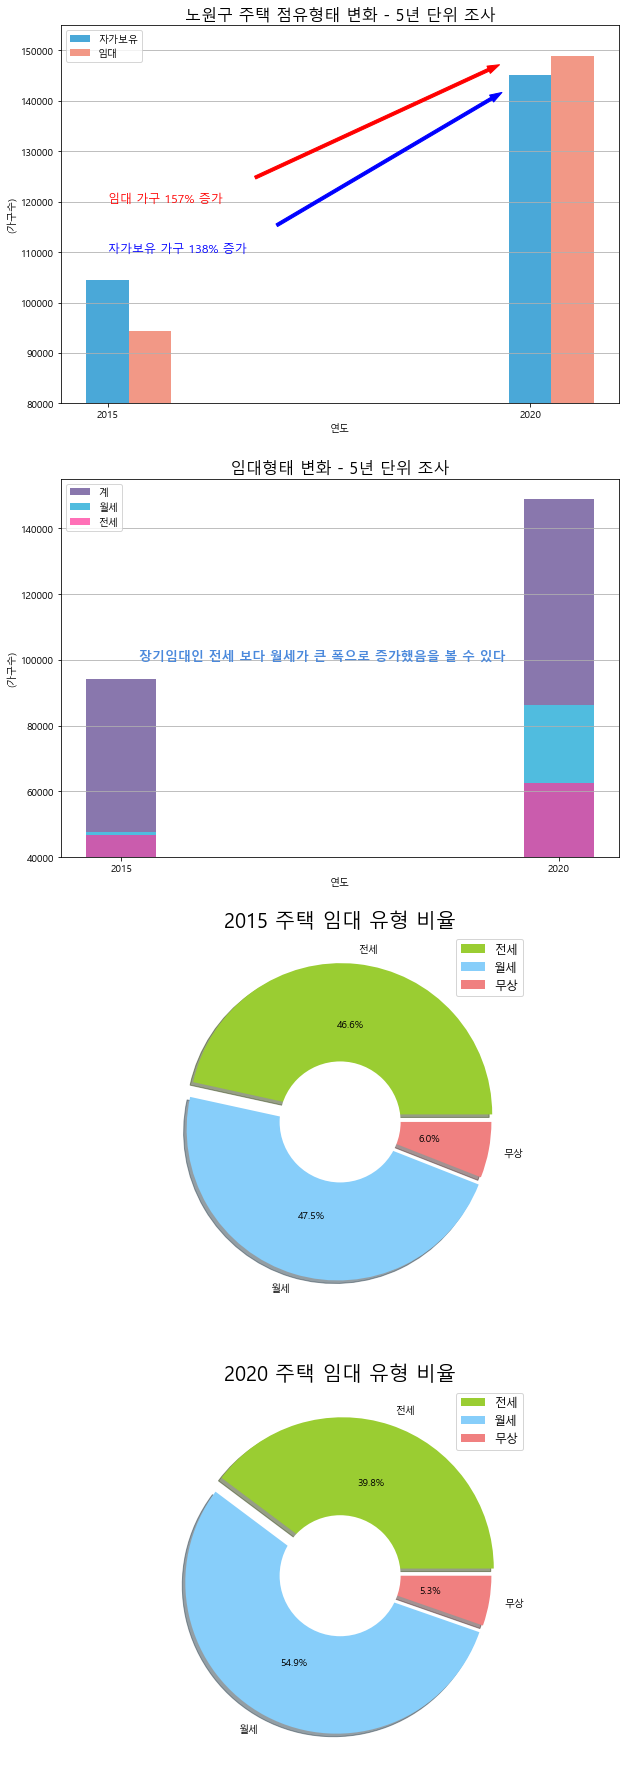

In [56]:
import pandas as ps
import matplotlib.pyplot as plt  
import numpy as np

plt.rc('font' , family = 'Malgun Gothic') 


fig, ax = plt.subplots(4, 1 , figsize=(10,32))

# plt.subplots_adjust(wspace=1)

ax[0].bar(year, occu['자가'] , color = '#4aa8d8' , width=0.5 , label = '자가보유' )
ax[0].bar(year+0.5, occu['총임대'] , color = '#f29886' , width=0.5, label = '임대')
ax[0].grid(axis='y')
ax[0].set_ylim([80000,155000])
ax[0].set_ylabel('(가구수)')
ax[0].set_xlabel('연도')
ax[0].set_title('노원구 주택 점유형태 변화 - 5년 단위 조사' , fontsize = 16)
ax[0].set_xticks([2015,2020])
ax[0].annotate('자가보유 가구 138% 증가' , (2020,145000) , xytext=(2015,110000) , color = 'blue' ,fontsize = 12, 
             arrowprops=dict(color = 'blue', facecolor='blue', width=3, shrink=0.1, headwidth=8))
ax[0].annotate('임대 가구 157% 증가' , (2020,150000) , xytext=(2015,120000) , color = 'red',fontsize = 12, 
             arrowprops=dict(color = 'red' ,facecolor='red', width=3, shrink=0.1, headwidth=8))
ax[0].legend()


ax[1].bar(year, occu['총임대'] , color = '#8977ad' , label = '계' , alpha = 1)
ax[1].bar(year, occu['월세'] , color = '#50bcdf' , label = '월세' , alpha = 1) 
ax[1].bar(year, occu['전세'] , color = '#ff3399' , label = '전세' , alpha = 0.7) 
ax[1].grid(axis='y')
ax[1].set_xlabel('연도')
ax[1].set_xticks([2015,2020])
ax[1].set_ylim([40000,155000])
ax[1].set_ylabel('(가구수)')
ax[1].set_title('임대형태 변화 - 5년 단위 조사' , fontsize = 16)
ax[1].annotate('장기임대인 전세 보다 월세가 큰 폭으로 증가했음을 볼 수 있다' , (2015.2,100000), color = '#4B89DC',weight = 'bold',fontsize = 13)
ax[1].legend()


colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
labels = ['전세', '월세', '무상']



centre_circle = plt.Circle((0,0), 0.40, color='black', fc='white', linewidth=0)
 
y = occu.loc['2015' , '전세' : '무상']
ax[2].pie(y , labels = labels, colors = colors, autopct='%.1f%%' ,explode = [0.05, 0.05, 0] , shadow = True )
ax[2].set_title('2015 주택 임대 유형 비율' , fontsize = 20)
ax[2].add_artist(centre_circle)
ax[2].legend(fontsize = 12)



centre_circle = plt.Circle((0,0), 0.40, color='black', fc='white', linewidth=0)

y = occu.loc['2020' , '전세' : '무상']
labels = ['전세', '월세', '무상']
ax[3].pie(y , labels = labels, colors = colors, autopct='%.1f%%' , explode = [0.05, 0.05, 0] ,shadow = True )
ax[3].set_title('2020 주택 임대 유형 비율' , fontsize = 20)
ax[3].legend(fontsize = 12)
ax[3].add_artist(centre_circle)




    
plt.show()


